In [1]:
# Import Libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Upload the dataset to drive and provide the path here

bitcoin_dataset = pd.read_csv('/content/drive/MyDrive/CO544/MLproject/ProcessedData/BitcoinNoScalerOversampled.csv')

## 1.0 No Scaling with Oversampling

### 1.1 10-Fold Cross Validation

In [ ]:
# Assuming bitcoin_df is your DataFrame and 'label' is the target column
target = 'label'

# Split the data into features (X) and target (y)
X = bitcoin_dataset.drop(columns=[target])
y = bitcoin_dataset[target]

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define custom scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(xgb_model, X, y, cv=kf, scoring=scoring)

# Display the results
print("10-Fold Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.3f} ± {cv_results['test_' + metric].std():.3f}")

# Example output storage to DataFrame
results_df = pd.DataFrame({
    'Fold': range(1, 11),
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall': cv_results['test_recall'],
    'F1 Score': cv_results['test_f1']
})

print(results_df)

10-Fold Cross-Validation Results:
Accuracy: 0.942 ± 0.000
Precision: 0.934 ± 0.001
Recall: 0.953 ± 0.000
F1: 0.943 ± 0.000
   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.942052   0.933467  0.951999  0.942642
1     2  0.942311   0.933828  0.952217  0.942933
2     3  0.942510   0.933302  0.953048  0.943072
3     4  0.942503   0.933496  0.952813  0.943056
4     5  0.941477   0.932271  0.951877  0.941972
5     6  0.943076   0.933989  0.953509  0.943648
6     7  0.942566   0.934129  0.952476  0.943213
7     8  0.942454   0.933790  0.952190  0.942900
8     9  0.942580   0.934101  0.952323  0.943124
9    10  0.942654   0.934178  0.952769  0.943382


### 1.2 XGBoost builtin cross validation

In [4]:
target = 'label'

X = bitcoin_dataset.drop(columns=[target])
y = bitcoin_dataset[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set Parameters
params = {
    'booster': 'gbtree',
    'objective': 'multi:softprob',
    'num_class': 3,
    'eta': 0.3,
    'max_depth': 6,
    'eval_metric': 'mlogloss'
}



In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_round,
    nfold=5,
    metrics={'mlogloss'},
    early_stopping_rounds=10
)

print(cv_results)


    train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0              0.844056            0.000112            0.844067   
1              0.700504            0.000235            0.700524   
2              0.604893            0.000185            0.604927   
3              0.537760            0.000724            0.537805   
4              0.484602            0.001570            0.484651   
..                  ...                 ...                 ...   
95             0.147539            0.000766            0.148264   
96             0.147250            0.000649            0.147979   
97             0.146919            0.000522            0.147661   
98             0.146428            0.000554            0.147179   
99             0.146116            0.000529            0.146881   

    test-mlogloss-std  
0            0.000076  
1            0.000176  
2            0.000112  
3            0.000818  
4            0.001476  
..                ...  
95           0.000722  
96 

In [ ]:
cv_results.to_csv('/content/drive/MyDrive/CO544/MLproject/xgboost_cv_results.csv', index=False)

### 1.3 Feature Importance

In [5]:
# Train the Model

# Specify the number of boosting rounds
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Predict the test set
preds = bst.predict(dtest)
best_preds = [int(np.argmax(line)) for line in preds]

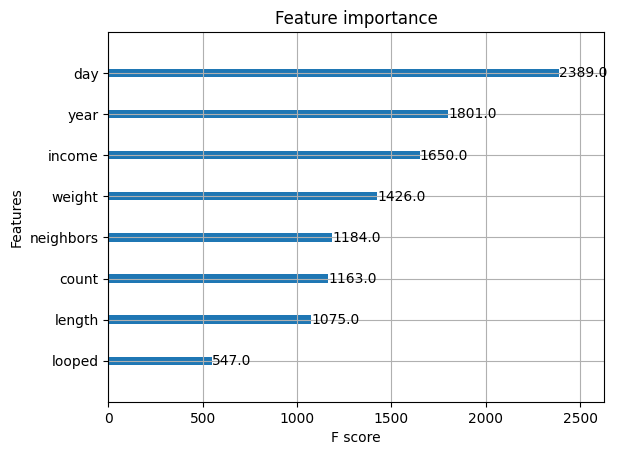

In [ ]:
xgb.plot_importance(bst)
plt.show()

### 1.4 Tree Visualization

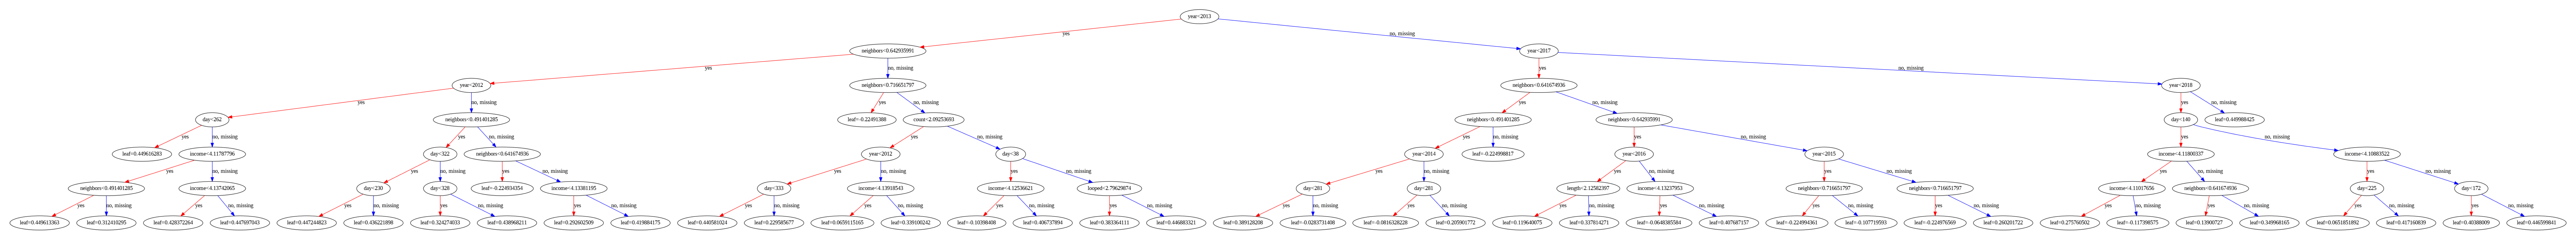

In [8]:
from xgboost import plot_tree

# Visualize the first tree
fig, ax = plt.subplots(figsize=(40, 20), dpi=300)
plot_tree(bst, num_trees=0, ax=ax)
plt.savefig('/content/drive/MyDrive/CO544/MLproject/Xgboost_tree1.png')
plt.show()